<a href="https://colab.research.google.com/github/nitinyadav2203/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STROKE PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp=pd.read_csv('/content/drive/MyDrive/Data Set/healthcare-dataset-stroke-data.csv')


In [ ]:
sp.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
sp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# MAIN

In [ ]:
sp.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
sp.shape

(5110, 12)

In [ ]:
sp.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
sp.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64



> We have 201 null values on bmi column, well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much



In [ ]:
bmi_mean = sp['bmi'].mean()
sp['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.893236911794673

In [ ]:
sp.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64



> As we dont need ID, therefore we drop ID







In [ ]:
sp.drop('id',axis=1,inplace=True)
sp.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


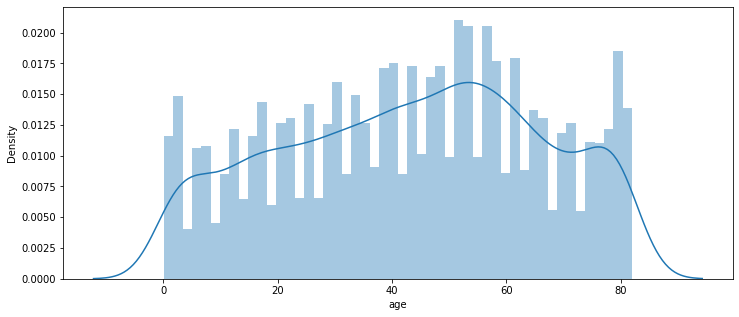

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(sp['age'], bins=50);
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


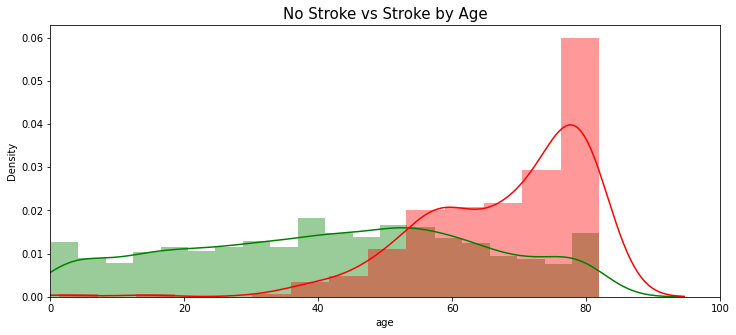

In [ ]:
plt.figure(figsize=(12,5))

sns.distplot(sp[sp['stroke'] == 0]["age"], color='green')
sns.distplot(sp[sp['stroke'] == 1]["age"], color='red')

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([0,100])
plt.show()

As we can see age coloum peak is high at 60s. Therefore the stroke risk is high to peoples who are at elder ages. 

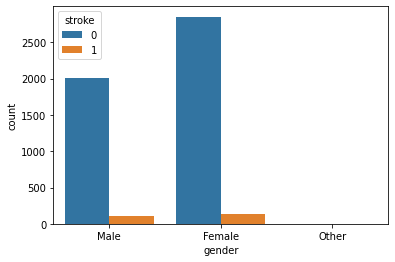

In [ ]:
sns.countplot(x='gender', data=sp, hue='stroke');

So, here we can see Females are more than Male and we don't have much data on who had stroke based on this.

0    4861
1     249
Name: stroke, dtype: int64

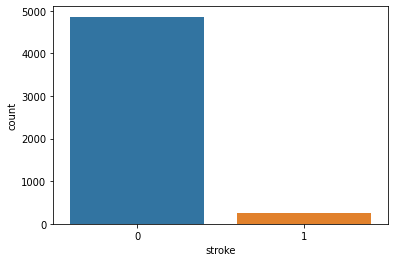

In [ ]:
sns.countplot(x='stroke', data=sp)
sp.stroke.value_counts()

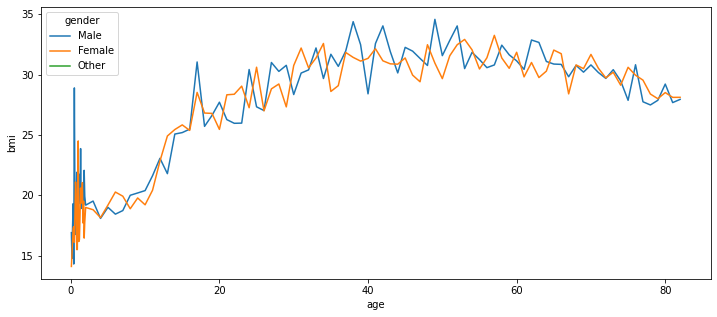

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sp, x="age", y="bmi", hue='gender', ci=None);

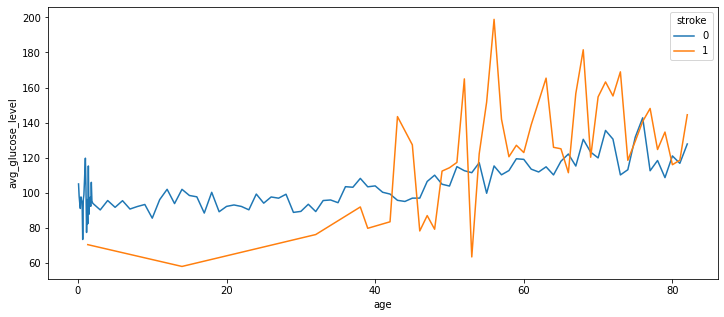

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=sp, x="age", y="avg_glucose_level", hue='stroke', ci=None);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


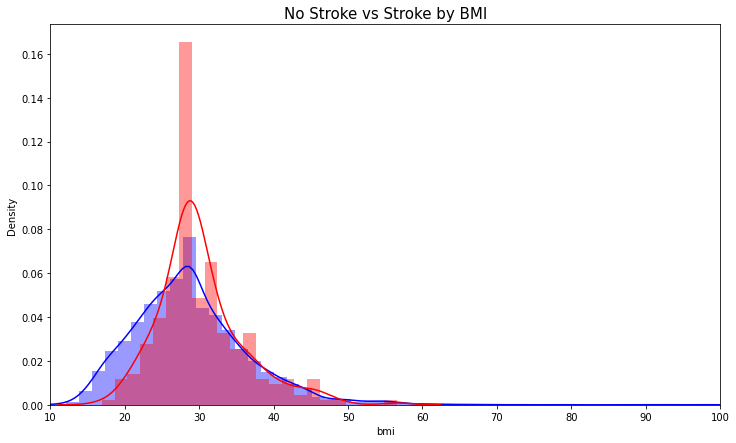

In [ ]:
plt.figure(figsize=(12,7))

sns.distplot(sp[sp['stroke'] == 0]["bmi"], color='blue')
sns.distplot(sp[sp['stroke'] == 1]["bmi"], color='red') 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

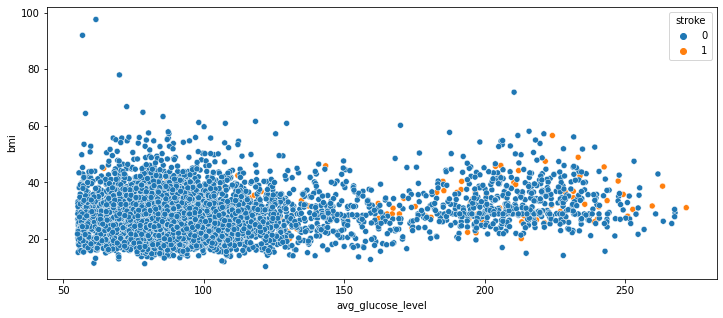

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=sp,x='avg_glucose_level',y='bmi', hue='stroke')

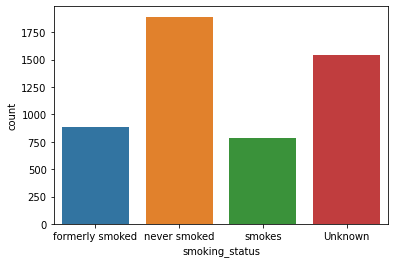

In [ ]:
sns.countplot(x='smoking_status',data=sp)

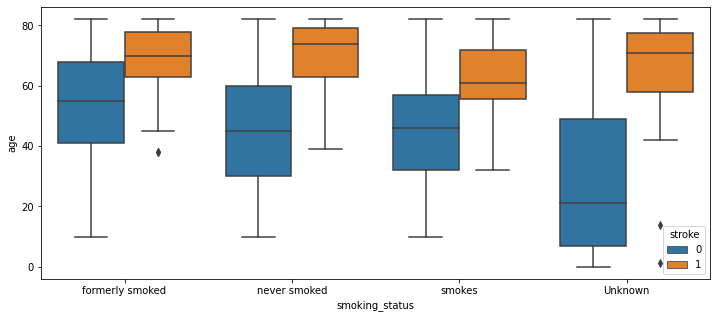

In [ ]:
plt.figure(figsize=(12,5))

sns.boxplot(data=sp,y='age',x='smoking_status',hue='stroke')


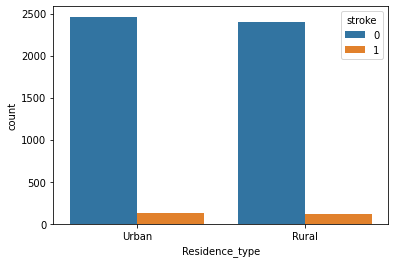

In [ ]:
sns.countplot(data=sp,x='Residence_type',hue='stroke')
plt.show()

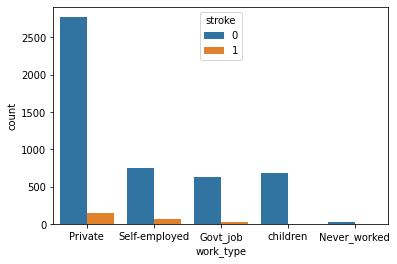

In [ ]:
sns.countplot(x='work_type', hue='stroke', data=sp);

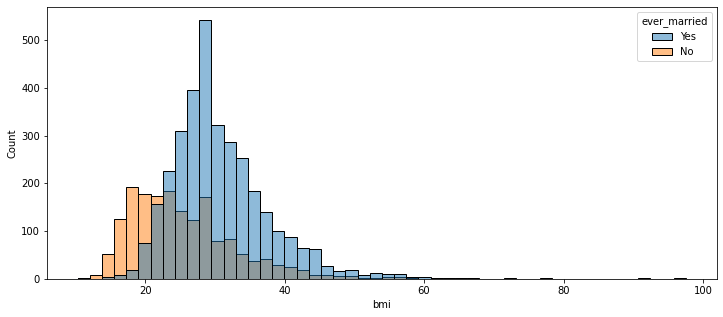

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=sp,hue='ever_married',x='bmi',bins=50)
plt.show()

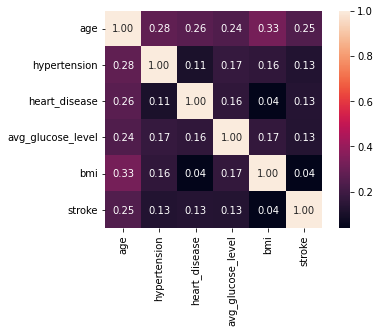

In [ ]:
correlation=sp.corr()
sns.heatmap(correlation, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()


# **OBJECTIVES**

**Minor Objectives:**
* Average age of person had stroke.
* Average Glucose level of person who had stroke and Average Glucose level of person who didn’t have stroke.
* Average persons who had stroke due to Heart Disease.
* Average BMI of people who had stroke.
* Chances of stroke of people from Urban and Rural Area.
* Chances of stroke due to smoking.
* Average of people who had stroke after marriage.
* Average of female who had Stroke and average of male had stroke due to Smoking.

**Major Objectives:**
* Average Male had stroke, Average Female had stroke.
* Average people who had stroke due to Hypertension.
* Chances of Stroke who have Hypertension, Heart Disease, Smoke.
* Chance of stroke according to Job Type.

# DATA OF WHO HAD AND WHO DIDN'T HAD STROKE

In [ ]:
had_Stroke = sp.loc[(sp['stroke']==1)]
had_Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1


In [ ]:
not_Stroke=sp.loc[sp['stroke']==0]
not_Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# **DATA ANALYSIS**

**MINOR OBJECTIVES**

**1. Age**

In [ ]:
had_Stroke['age'].mean()

67.72819277108434

* So, the average age of people who had Stroke is 67.
* So, we can conclude that people who have age greater than 65 have more chances of having stroke.

**2. Glucose Level**

In [ ]:
had_Stroke['avg_glucose_level'].mean()

132.54473895582322

In [ ]:
not_Stroke['avg_glucose_level'].mean()

104.79551326887444

* As we know, Normal blood glucose levels for adults, without diabetes, is 90 to 110 mg/dL.


* And here we can see who had Stroke had average glucose level higher than they should have. This shows that we should maintain our glucose level to prevent Stroke

**3. Heart Disease**

In [ ]:
sp['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
had_Stroke['heart_disease'].value_counts()

0    202
1     47
Name: heart_disease, dtype: int64

In [ ]:
not_Stroke['heart_disease'].value_counts()

0    4632
1     229
Name: heart_disease, dtype: int64

In [ ]:
print(f"Percentage of people who had Stroke and were patients of Heart Disease are {round((had_Stroke['heart_disease'].value_counts()[1]/sp['heart_disease'].value_counts()[1])*100,2)}")
print(f"Percentage of people who had Stroke and who are not patients of Heart Disease are {round((had_Stroke['heart_disease'].value_counts()[1]/sp['heart_disease'].value_counts()[0])*100,2)}")

Percentage of people who had Stroke and were patients of Heart Disease are 17.03
Percentage of people who had Stroke and who are not patients of Heart Disease are 0.97


* We can convey that Heart Disease can be considered as a minor factor as 17% had stroke and who had Heart Disease.

**4. BMI**

In [ ]:
had_Stroke['bmi'].mean()

30.217789062135694

* The higher the BMI, the greater the risk of developing additional health problems.
* A healthy weight is considered to be a BMI of 24 or less. A BMI of 25 to 29.9 is considered overweight.
* And here BMI average is above 30 and it is considered as obesity which is the major cause of having a Stroke.

**6.LIVING AREA**

In [ ]:
had_Stroke['Residence_type'].value_counts()

Urban    135
Rural    114
Name: Residence_type, dtype: int64

In [ ]:
not_Stroke['Residence_type'].value_counts()

Urban    2461
Rural    2400
Name: Residence_type, dtype: int64

In [ ]:
print(f"Percentage of people who had Stroke living in Urban Area  {round((had_Stroke['Residence_type'].value_counts()['Urban']/sp['Residence_type'].value_counts()['Urban'])*100,2)}")
print(f"Percentage of people who had Stroke living in Rural Area  {round((had_Stroke['Residence_type'].value_counts()['Rural']/sp['Residence_type'].value_counts()['Rural'])*100,2)}")

Percentage of people who had Stroke living in Urban Area  5.2
Percentage of people who had Stroke living in Rural Area  4.53


* As the percentage of people having stroke as per their livelihood, we cannot say because Urban and Rural both have average almost same.

**7. SMOKING**

In [ ]:
sp.value_counts('smoking_status')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64

In [ ]:
had_Stroke['smoking_status'].value_counts()

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64

In [ ]:
not_Stroke['smoking_status'].value_counts()

never smoked       1802
Unknown            1497
formerly smoked     815
smokes              747
Name: smoking_status, dtype: int64

In [ ]:
print(f"Percentage of people who had stroke and were smokers {round((had_Stroke['smoking_status'].value_counts()['smokes']/sp['smoking_status'].value_counts()['smokes'])*100,2)}")
print(f"Percentage of people who had stroke and who never smoked {round((had_Stroke['smoking_status'].value_counts()['never smoked']/sp['smoking_status'].value_counts()['never smoked'])*100,2)}")
print(f"Percentage of people who had stroke and who were formerly smokers {round((had_Stroke['smoking_status'].value_counts()['formerly smoked']/sp['smoking_status'].value_counts()['formerly smoked'])*100,2)}")

Percentage of people who had stroke and were smokers 5.32
Percentage of people who had stroke and who never smoked 4.76
Percentage of people who had stroke and who were formerly smokers 7.91


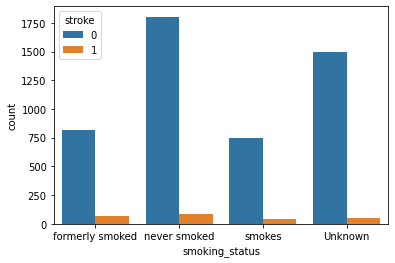

In [ ]:
sns.countplot(x='smoking_status',hue='stroke',data=sp)

* Through this data Smoking cannot be considered as a cause for Stroke

**8. MARRIED LIFE**

In [ ]:
had_Stroke['ever_married'].value_counts()

Yes    220
No      29
Name: ever_married, dtype: int64

In [ ]:
not_Stroke['ever_married'].value_counts()

Yes    3133
No     1728
Name: ever_married, dtype: int64

In [ ]:
print(f"Percentage of people who had Stroke who were married {round((had_Stroke['ever_married'].value_counts()['Yes']/sp['ever_married'].value_counts()['Yes'])*100,2)}")
print(f"Percentage of people who had Stroke who were not married {round((had_Stroke['ever_married'].value_counts()['No']/sp['ever_married'].value_counts()['No'])*100,2)}")

Percentage of people who had Stroke who were married 6.56
Percentage of people who had Stroke who were not married 1.65


* There is slight chances of **NOT** having Stroke if you are Unmarried


**MAJOR OBJECTIVES**

**GENDER**

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

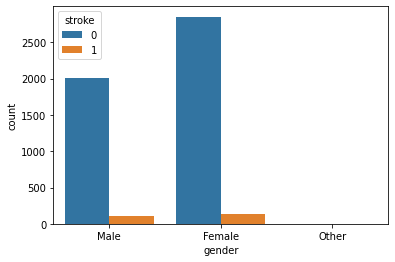

In [ ]:
sns.countplot(x='gender',hue='stroke',data=sp)
sp['gender'].value_counts()

In [ ]:
had_Male=sp.loc[(sp['gender']=='Male')&(sp['stroke']==1)]
not_Male=sp.loc[(sp['gender']=='Male')&(sp['stroke']==0)]
had_Female=sp.loc[(sp['gender']=='Female')&(sp['stroke']==1)]
not_Female=sp.loc[(sp['gender']=='Female')&(sp['stroke']==0)]

In [ ]:
print(f"Percentage of  who had Stroke in  {round((had_Male['gender'].value_counts()/sp['gender'].value_counts()[1])*100,2)}")
print(f"Percentage of  who had Stroke in {round((had_Female['gender'].value_counts()/sp['gender'].value_counts()[1])*100,2)}")


Percentage of  who had Stroke in  Male    5.11
Name: gender, dtype: float64
Percentage of  who had Stroke in Female    6.67
Name: gender, dtype: float64


* There is no much difference between Male or Female. But still male have less chance in having Stroke as per our data.
* We did have more number of data in Females and still found they have **0.9%** more chances to have a Stroke. 

**HYPERTENSION**

In [ ]:
sp.value_counts('hypertension')

hypertension
0    4612
1     498
dtype: int64

In [ ]:
had_Stroke.value_counts('hypertension')

hypertension
0    183
1     66
dtype: int64

In [ ]:
not_Stroke.value_counts('hypertension')

hypertension
0    4429
1     432
dtype: int64

In [ ]:
hs=sp.loc[(sp['hypertension']==1)&(sp['stroke']==1)]
nhs=sp.loc[(sp['hypertension']==0)&(sp['stroke']==1)]
hns=sp.loc[(sp['hypertension']==1)&(sp['stroke']==0)]
nhns=sp.loc[(sp['hypertension']==0)&(sp['stroke']==0)]

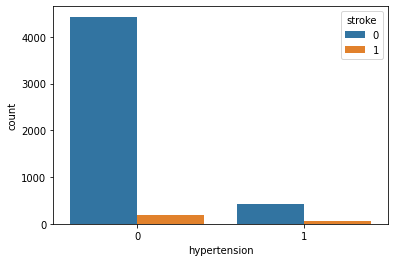

In [ ]:
sns.countplot(x='hypertension',hue='stroke',data=sp)

In [ ]:
print(f"Percentage of  who had Stroke having Hypertension  {round((len(hs)/len(had_Stroke)*100),2)}")
print(f"Percentage of  who had Stroke not Having Hypertension  {round((len(nhs)/len(had_Stroke)*100),2)}")
print(f"Percentage of  who didn't had Stroke having Hypertension  {round((len(hns)/len(not_Stroke)*100),2)}")
print(f"Percentage of  who didn't had Stroke and didn't had Hypertension  {round((len(nhns)/len(not_Stroke)*100),2)}")

Percentage of  who had Stroke having Hypertension  26.51
Percentage of  who had Stroke not Having Hypertension  73.49
Percentage of  who didn't had Stroke having Hypertension  8.89
Percentage of  who didn't had Stroke and didn't had Hypertension  91.11


* If you are not having hypertension, then the chances of having STROKE is very less

**JOB TYPE**

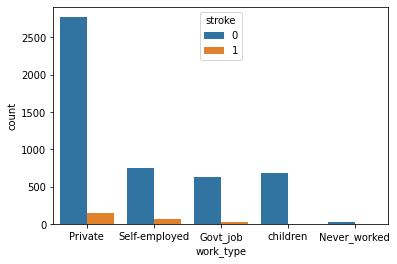

In [ ]:
sns.countplot(x='work_type',hue='stroke',data=sp)

In [ ]:
sp['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
had_Stroke['work_type'].value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

In [ ]:
not_Stroke['work_type'].value_counts()

Private          2776
Self-employed     754
children          685
Govt_job          624
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
print(f"Percentage of  who had Stroke in Private Sector {round((had_Stroke['work_type'].value_counts()['Private']/sp['work_type'].value_counts()['Private'])*100,2)}")
print(f"Percentage of  who had Stroke who were Self Employed {round((had_Stroke['work_type'].value_counts()['Self-employed']/sp['work_type'].value_counts()['Self-employed'])*100,2)}")
print(f"Percentage of  children who had Stroke {round((had_Stroke['work_type'].value_counts()['children']/sp['work_type'].value_counts()['children'])*100,2)}")
print(f"Percentage of  people who had Stroke working in Goverment Sector {round((had_Stroke['work_type'].value_counts()['Govt_job']/sp['work_type'].value_counts()['Govt_job'])*100,2)}")
print(f"Percentage of  people who didn't had stroke and NEVER WORKED {round((not_Stroke['work_type'].value_counts()['Never_worked']/sp['work_type'].value_counts()['Never_worked'])*100,2)}")


Percentage of  who had Stroke in Private Sector 5.09
Percentage of  who had Stroke who were Self Employed 7.94
Percentage of  children who had Stroke 0.29
Percentage of  people who had Stroke working in Goverment Sector 5.02
Percentage of  people who didn't had stroke and NEVER WORKED 100.0


* Having Stroke (WORKING PEOPLE)-> **Self Employed** > **Private Sector** > **Goverment Sector** .
* But as we can see if you never worked then you won't be having stroke.

**WORST SENARIO**

In [ ]:
hhs=sp.loc[(sp['hypertension']==1)&(sp['heart_disease']==1)&(sp['smoking_status']=='smokes')]
yhhs=hhs.loc[hhs['stroke']==1]
nhhs=hhs.loc[hhs['stroke']==0]

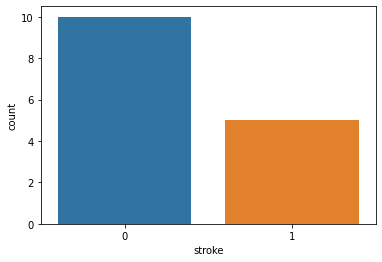

In [ ]:
sns.countplot(x='stroke',data=hhs)

In [ ]:
len(yhhs)

5

In [ ]:
len(nhhs)

10

In [ ]:
print(f"Percentage of People who had all Hypertension, Smokes, Heart Disease:")
print(f"> Had Stroke: {round((len(yhhs)/len(hhs))*100,2)}")
print(f"> Didn't had Stroke: {round((len(nhhs)/len(hhs))*100,2)}")

Percentage of People who had all Hypertension, Smokes, Heart Disease:
> Had Stroke: 33.33
> Didn't had Stroke: 66.67


#MODEL TRAINING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
sp.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
sp=sp.sample(frac=1)

In [ ]:
x=sp.drop('stroke',axis=1,inplace=False)
y=sp['stroke']

In [ ]:
en=LabelEncoder()
x['gender']=en.fit_transform(x['gender'])
x['ever_married']=en.fit_transform(x['ever_married'])
x['work_type']=en.fit_transform(x['work_type'])
x['Residence_type']=en.fit_transform(x['Residence_type'])
x['smoking_status']=en.fit_transform(x['smoking_status'])

In [ ]:
x['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
801,0,77.0,0,0,1,2,0,95.10,35.000000,2
3379,0,41.0,0,0,1,2,1,74.85,24.800000,1
1445,1,9.0,0,0,0,4,0,60.39,16.400000,0
2515,1,62.0,1,1,1,2,0,176.25,28.893237,2
4315,0,28.0,0,0,1,2,1,100.80,39.300000,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_test,clf.predict(x_test))

0.8988910632746249

In [ ]:
precision_score(y_test,clf.predict(x_test))

0.11

In [ ]:
recall_score(y_test,clf.predict(x_test))

0.14285714285714285

In [ ]:
confusion_matrix(y_test,clf.predict(x_test))

array([[1367,   89],
       [  66,   11]])

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

5080    0
1247    0
2591    0
3466    0
2105    0
       ..
1581    0
3119    0
4140    0
1141    0
539     0
Name: stroke, Length: 1533, dtype: int64

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
801,0,77.0,0,0,1,2,0,95.10,35.000000,2
3379,0,41.0,0,0,1,2,1,74.85,24.800000,1
1445,1,9.0,0,0,0,4,0,60.39,16.400000,0
2515,1,62.0,1,1,1,2,0,176.25,28.893237,2
4315,0,28.0,0,0,1,2,1,100.80,39.300000,1


In [ ]:
clf.predict([[0,49,0,0,1,2,1,60.91,29.9,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])